In [ ]:
var openDigger = require('../src/open_digger'); //导入open_digger
var query = openDigger.driver.clickhouse.query;
var endYear = 2018, startYear = 2015; // 起止年份
var years = []
for(var year = startYear;year <= endYear; year ++){
    years.push(year)
}
var startMonth = 1, endMonth = 12; //起止月份
var months = []
for(var m = startMonth;m <= endMonth;m++){
    months.push(m)
}
var my_repo_id = 4931659;

12

┌─────────┬───────────┬──────────────┐
│ (index) │   时间    │ 新增 Star 数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-1'  │      53      │
│    1    │ '2015-3'  │      60      │
│    2    │ '2015-4'  │      81      │
│    3    │ '2015-5'  │      32      │
│    4    │ '2015-6'  │      0       │
│    5    │ '2015-7'  │      34      │
│    6    │ '2015-8'  │      60      │
│    7    │ '2015-9'  │      1       │
│    8    │ '2015-10' │      16      │
│    9    │ '2015-11' │      99      │
│   10    │ '2015-12' │      73      │
│   11    │ '2016-1'  │      78      │
│   12    │ '2016-2'  │     119      │
│   13    │ '2016-3'  │     133      │
│   14    │ '2016-5'  │      70      │
│   15    │ '2016-6'  │      74      │
│   16    │ '2016-8'  │     108      │
│   17    │ '2016-9'  │      0       │
│   18    │ '2016-10' │      46      │
│   19    │ '2016-11' │      3       │
│   20    │ '2016-12' │      25      │
│   21    │ '2017-1'  │      0       │
│   22    │ '2017-2'  │      1

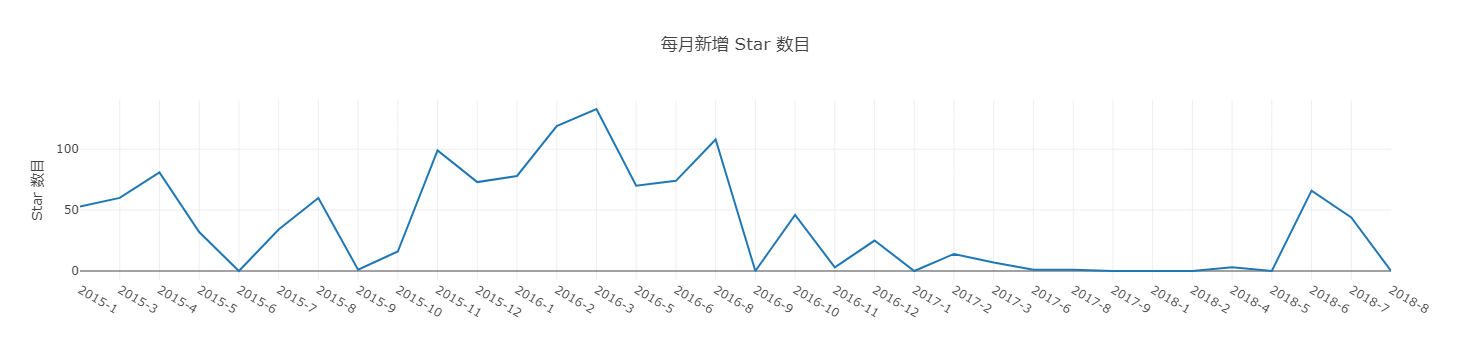

In [ ]:
// 1.1 每月新增 Star 数
Promise.all(
    years.map(y => {
    var q = `
    select time, stars
    from 
    (select max(repo_stargazers_count)-min(repo_stargazers_count) as stars ,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent')
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    
    var stars = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '新增 Star 数':parseInt(m_info.stars)});
            stars.push(m_info.stars);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: stars, mode:'scatter', name:'Star'}, 
    ], {
        title: '每月新增 Star 数目',
        yaxis: { title: 'Star 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────┐
│ (index) │   时间    │ 新增 fork 数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-1'  │      6       │
│    1    │ '2015-3'  │      16      │
│    2    │ '2015-4'  │      18      │
│    3    │ '2015-5'  │      8       │
│    4    │ '2015-6'  │      0       │
│    5    │ '2015-7'  │      8       │
│    6    │ '2015-8'  │      6       │
│    7    │ '2015-9'  │      0       │
│    8    │ '2015-10' │      2       │
│    9    │ '2015-11' │      20      │
│   10    │ '2015-12' │      13      │
│   11    │ '2016-1'  │      13      │
│   12    │ '2016-2'  │      11      │
│   13    │ '2016-3'  │      26      │
│   14    │ '2016-5'  │      22      │
│   15    │ '2016-6'  │      9       │
│   16    │ '2016-8'  │      13      │
│   17    │ '2016-9'  │      0       │
│   18    │ '2016-10' │      3       │
│   19    │ '2016-11' │      3       │
│   20    │ '2016-12' │      2       │
│   21    │ '2017-1'  │      0       │
│   22    │ '2017-2'  │      0

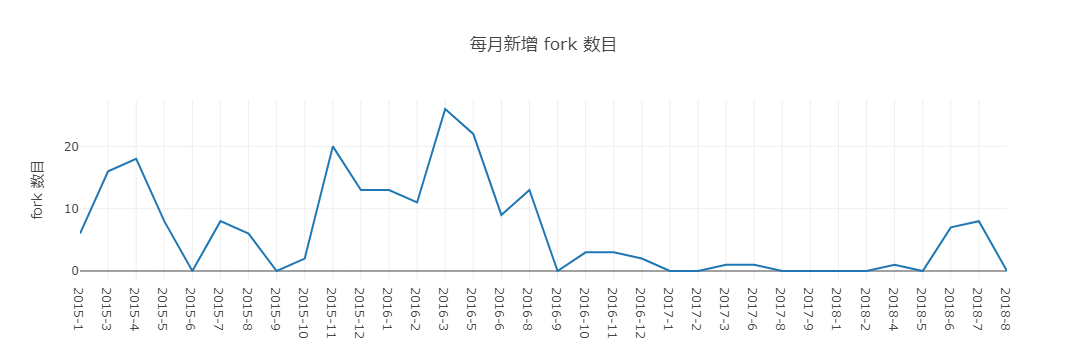

In [59]:
// 1.2 每月新增 fork 数
Promise.all(
    years.map(y => {
    var q = `
    select time, forks
    from 
    (select max(repo_forks_count)-min(repo_forks_count) as forks ,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent')
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var forks = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '新增 fork 数':parseInt(m_info.forks)});
            forks.push(m_info.forks);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: forks, mode:'scatter', name:'fork'}, 
    ], {
        title: '每月新增 fork 数目',
        yaxis: { title: 'fork 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬────────────────────┐
│ (index) │   时间    │ 每月打开 issues 数 │
├─────────┼───────────┼────────────────────┤
│    0    │ '2015-1'  │         3          │
│    1    │ '2015-3'  │         5          │
│    2    │ '2015-4'  │         5          │
│    3    │ '2015-5'  │         1          │
│    4    │ '2015-6'  │         1          │
│    5    │ '2015-7'  │         3          │
│    6    │ '2015-8'  │         2          │
│    7    │ '2015-10' │         1          │
│    8    │ '2015-11' │         1          │
│    9    │ '2015-12' │         1          │
│   10    │ '2016-2'  │         2          │
│   11    │ '2016-3'  │         2          │
│   12    │ '2016-4'  │         1          │
│   13    │ '2016-5'  │         1          │
│   14    │ '2016-6'  │         3          │
│   15    │ '2016-7'  │         2          │
│   16    │ '2016-8'  │         4          │
│   17    │ '2016-9'  │         3          │
│   18    │ '2016-10' │         1          │
│   19    │ '2016

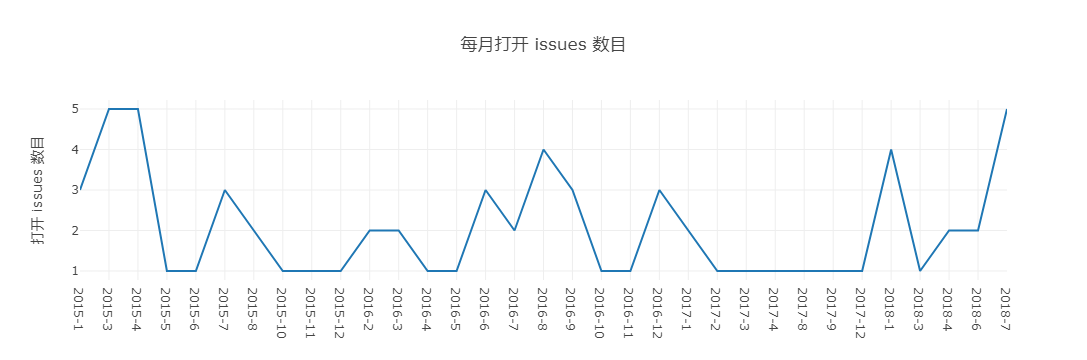

In [58]:
// 2.1 每月打开 Issue 数
Promise.all(years.map(y => {
    var q = `
    select time, open_issues
    from 
    (select count(issue_id) as open_issues,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('opened','reopened')
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    //console.log(data)
    var open_issues = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '每月打开 issues 数':parseInt(m_info.open_issues)});
            open_issues.push(m_info.open_issues);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: open_issues, mode:'scatter', name:'打开issues'}, 
    ], {
        title: '每月打开 issues 数目',
        yaxis: { title: '打开 issues 数目'},
        xaxis: {type: 'category'}
    });

});

┌─────────┬───────────┬────────────────────┐
│ (index) │   时间    │ 每月关闭 issues 数 │
├─────────┼───────────┼────────────────────┤
│    0    │ '2015-3'  │         1          │
│    1    │ '2015-4'  │         2          │
│    2    │ '2015-5'  │         2          │
│    3    │ '2015-6'  │         1          │
│    4    │ '2015-7'  │         11         │
│    5    │ '2015-8'  │         2          │
│    6    │ '2015-11' │         8          │
│    7    │ '2015-12' │         1          │
│    8    │ '2016-1'  │         1          │
│    9    │ '2016-3'  │         3          │
│   10    │ '2016-4'  │         1          │
│   11    │ '2016-5'  │         1          │
│   12    │ '2016-8'  │         5          │
│   13    │ '2016-9'  │         1          │
│   14    │ '2016-10' │         1          │
│   15    │ '2017-1'  │         1          │
│   16    │ '2017-3'  │         1          │
│   17    │ '2017-10' │         1          │
│   18    │ '2018-6'  │         1          │
│   19    │ '2018

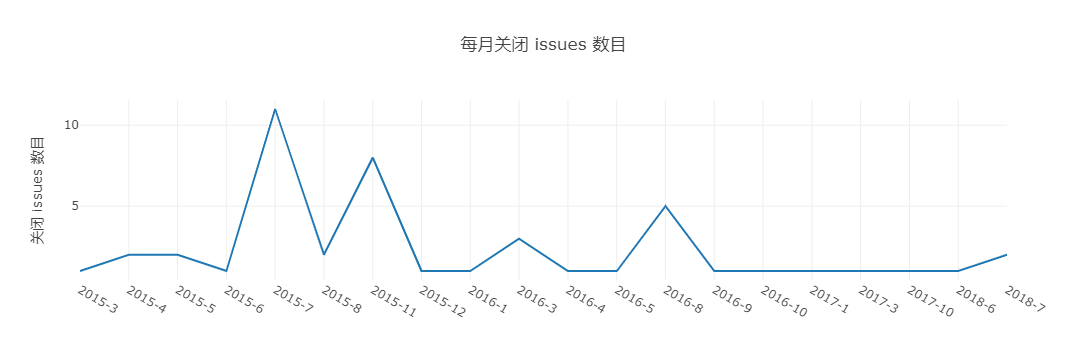

In [57]:
// 2.2 每月关闭 Issue 数
Promise.all(years.map(y => {
    var q = `
    select time, close_issues
    from 
    (select count(issue_id) as close_issues,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('closed')
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    //console.log(data)
    var close_issues = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '每月关闭 issues 数':parseInt(m_info.close_issues)});
            close_issues.push(m_info.close_issues);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: close_issues, mode:'scatter', name:'关闭issues'}, 
    ], {
        title: '每月关闭 issues 数目',
        yaxis: { title: '关闭 issues 数目'},
        xaxis: {type: 'category'}
    });

});

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 每月打开 PR 数目 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-1'  │        3         │
│    1    │ '2015-3'  │        2         │
│    2    │ '2015-4'  │        4         │
│    3    │ '2015-5'  │        2         │
│    4    │ '2015-6'  │        1         │
│    5    │ '2015-7'  │        3         │
│    6    │ '2015-8'  │        9         │
│    7    │ '2015-9'  │        1         │
│    8    │ '2015-10' │        2         │
│    9    │ '2015-11' │        6         │
│   10    │ '2015-12' │        6         │
│   11    │ '2016-1'  │        4         │
│   12    │ '2016-2'  │        4         │
│   13    │ '2016-3'  │        9         │
│   14    │ '2016-5'  │        5         │
│   15    │ '2016-6'  │        2         │
│   16    │ '2016-8'  │        4         │
│   17    │ '2016-9'  │        1         │
│   18    │ '2016-10' │        4         │
│   19    │ '2016-11' │        1         │
│   20    │ '2016-1

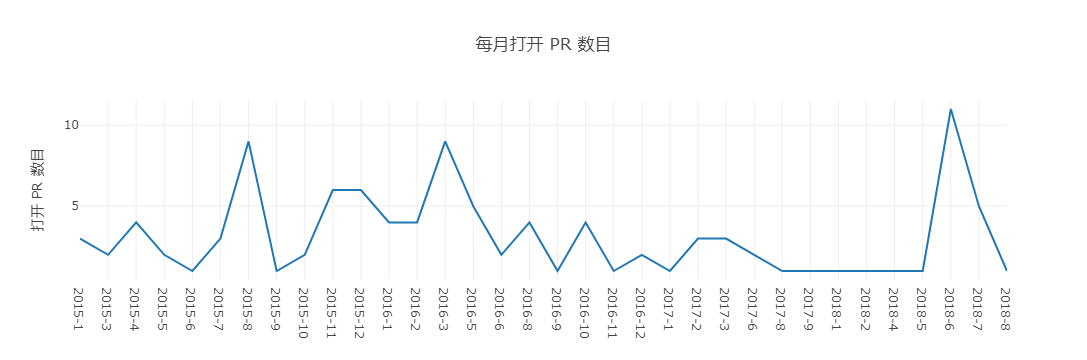

In [63]:
// 3.1 每月打开 PR 数
Promise.all(years.map(y => {
    var q = `
    select time, open_PRs
    from 
    (select count(issue_id) as open_PRs,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('opened','reopened')
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
   //console.log(data)
    var open_PRs = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '每月打开 PR 数目':parseInt(m_info.open_PRs)});
            open_PRs.push(m_info.open_PRs);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: open_PRs, mode:'scatter', name:'打开PR'}, 
    ], {
        title: '每月打开 PR 数目',
        yaxis: { title: '打开 PR 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 每月合并 PR 数目 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-4'  │        3         │
│    1    │ '2015-5'  │        1         │
│    2    │ '2015-7'  │        5         │
│    3    │ '2015-8'  │        9         │
│    4    │ '2015-9'  │        1         │
│    5    │ '2015-10' │        2         │
│    6    │ '2015-11' │        6         │
│    7    │ '2015-12' │        5         │
│    8    │ '2016-1'  │        5         │
│    9    │ '2016-2'  │        1         │
│   10    │ '2016-3'  │        11        │
│   11    │ '2016-5'  │        5         │
│   12    │ '2016-6'  │        1         │
│   13    │ '2016-8'  │        3         │
│   14    │ '2016-9'  │        1         │
│   15    │ '2016-10' │        5         │
│   16    │ '2016-11' │        1         │
│   17    │ '2016-12' │        1         │
│   18    │ '2017-2'  │        2         │
│   19    │ '2017-3'  │        3         │
│   20    │ '2017-8

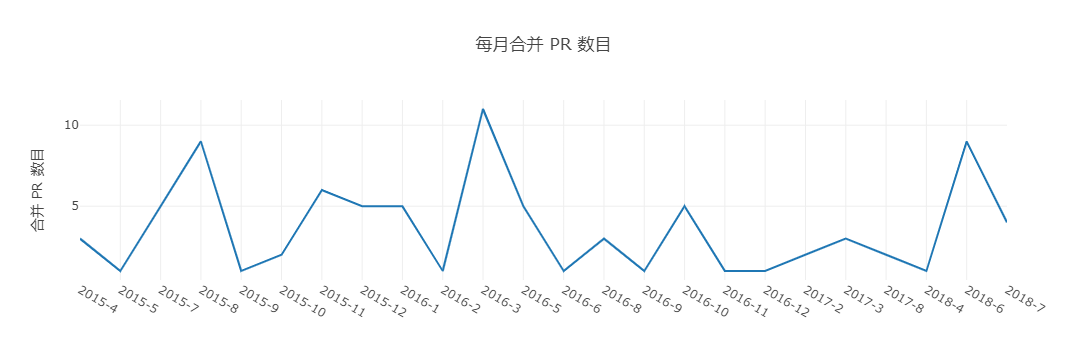

In [67]:
// 3.2 每月合并 PR 数
Promise.all(years.map(y => {
    var q = `
    select time, merge_PRs
    from 
    (select count(issue_id) as merge_PRs,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('closed') and pull_merged=1
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date))
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
   //console.log(data)
    var merge_PRs = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '每月合并 PR 数目':parseInt(m_info.merge_PRs)});
            merge_PRs.push(m_info.merge_PRs);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: merge_PRs, mode:'scatter', name:'合并PR'}, 
    ], {
        title: '每月合并 PR 数目',
        yaxis: { title: '合并 PR 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬────────────────────────┐
│ (index) │   时间    │ 每月仓库活跃开发者数目 │
├─────────┼───────────┼────────────────────────┤
│    0    │ '2015-1'  │          117           │
│    1    │ '2015-2'  │          157           │
│    2    │ '2015-3'  │          146           │
│    3    │ '2015-4'  │          128           │
│    4    │ '2015-5'  │           98           │
│    5    │ '2015-6'  │          104           │
│    6    │ '2015-7'  │           95           │
│    7    │ '2015-8'  │          137           │
│    8    │ '2015-9'  │          133           │
│    9    │ '2015-10' │          135           │
│   10    │ '2015-11' │          129           │
│   11    │ '2015-12' │          107           │
│   12    │ '2016-1'  │          137           │
│   13    │ '2016-2'  │          185           │
│   14    │ '2016-3'  │          191           │
│   15    │ '2016-4'  │          121           │
│   16    │ '2016-5'  │          138           │
│   17    │ '2016-6'  │          

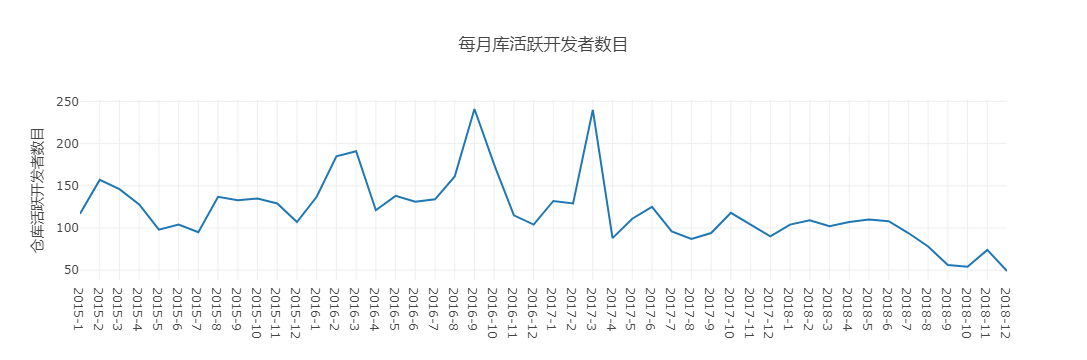

In [70]:
// 4 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数
Promise.all(years.map(y => {
    var q = `select count(distinct actor_id) as active_users,
    concat(toString(toYear(created_date)),'-',toString(toMonth(created_date))) as time
    from github_log.year${y} 
    where repo_id=${my_repo_id}
    group by toYear(created_date),toMonth(created_date)
    order by toYear(created_date),toMonth(created_date)
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    //console.log(data)
    var active_users = [], time = [], table = [];
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            table.push({'时间':m_info.time, '每月仓库活跃开发者数目':parseInt(m_info.active_users)});
            active_users.push(m_info.active_users);
            time.push(m_info.time)
        })
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: active_users, mode:'scatter', name:'仓库活跃开发者数目'}, 
    ], {
        title: '每月库活跃开发者数目',
        yaxis: { title: '仓库活跃开发者数目'},
        xaxis: {type: 'category'}
    });
});

In [92]:
// 5 Issue 从打开到关闭的平均时长和中位数（单位：天）
function median_of_arr(arr) {
        const middle = (arr.length + 1) / 2;
         // 避免在排序时发生变异
        const sorted = [...arr].sort((a, b) => a - b);
        const isEven = sorted.length % 2 === 0;
        return isEven ? (sorted[middle - 1.5]+ sorted[middle - 0.5]) / 2 : sorted[middle - 1];
    }
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select avg(dateDiff('day',issue_created_at,issue_closed_at)) avg,median(dateDiff('day',issue_created_at,issue_closed_at)) as median
    from github_log.year${year}
    where repo_id=${my_repo_id} and type = 'IssuesEvent'and action = 'closed'
    `)})
).then(
    data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            avg += m_info.avg;
            median.push(m_info.median);
            count ++
            //console.log("22:",m_info)
        })
    }
    )
    console.log("Issue 从打开到关闭的平均时长:",avg/count,"天\n")
    console.log("Issue 从打开到关闭的时长中位数:",median_of_arr(median),"天\n")
})

Issue 从打开到关闭的平均时长: 139.50778388278388 天

Issue 从打开到关闭的时长中位数: 12.5 天



In [93]:
// 6 PR 从打开到合入的平均时长和中位数（单位：天）
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select avg(dateDiff('day',issue_created_at,pull_merged_at)) avg,median(dateDiff('day',issue_created_at,pull_merged_at)) as median
    from github_log.year${year}
    where repo_id=${my_repo_id} and type = 'PullRequestEvent'and action = 'closed' and pull_merged=1
    `)})
).then(
    data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            avg += m_info.avg;
            median.push(m_info.median);
            count ++
            //console.log("22:",m_info)
        })
    }
    )
    console.log("PR 从打开到关闭的平均时长:",avg/count,"天\n")
    console.log("PR 从打开到关闭的时长中位数:",median_of_arr(median),"天\n")
})

PR 从打开到关闭的平均时长: 17.247176995798316 天

PR 从打开到关闭的时长中位数: 0.5 天



In [107]:
// 7.1 Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
Promise.all(
    years.map(year => { 
    return query(  
     ` 
    select avg(min_comment_time) as avg, median(min_comment_time) as median
    from(
    select min(dateDiff('day',issue_created_at,issue_comment_created_at)) as min_comment_time
    from(
    select issue_id,issue_created_at,issue_comment_created_at from github_log.year${year} where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created')
    group by issue_id)
    `
    );
    })
).then(
    data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            avg += m_info.avg;
            median.push(m_info.median);
            count ++
            //console.log("22:",m_info)
        })
    }
    )
    console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长:",avg/count,"天\n")
    console.log("Issue从打开到第一次有人回复（非本人回复）的时长中位数:",median_of_arr(median),"天\n")
})

Issue从打开到第一次有人回复（非本人回复）的平均时长: 192.47912733100233 天

Issue从打开到第一次有人回复（非本人回复）的时长中位数: 1 天



In [108]:
// 7.2 PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
Promise.all(
    years.map(year => { 
    return query(  
     ` 
    select avg(min_comment_time) as avg, median(min_comment_time) as median
    from(
    select min(dateDiff('day',issue_created_at,pull_review_comment_created_at)) as min_comment_time
    from(
    select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year${year} where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created')
    group by issue_id)
    `
    );
    })    
).then(
    data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(y_info=>{
        //console.log("11: ",y_info)
        y_info.forEach(m_info=>{
            avg += m_info.avg;
            median.push(m_info.median);
            count ++
            //console.log("22:",m_info)
        })
    }
    )
    console.log("PR 从打开到第一次有人回复（非本人回复）的平均时长:",avg/count,"天\n")
    console.log("PR 从打开到第一次有人回复（非本人回复）的时长中位数:",median_of_arr(median),"天\n")
})

PR 从打开到第一次有人回复（非本人回复）的平均时长: 8.75 天

PR 从打开到第一次有人回复（非本人回复）的时长中位数: 1.5 天



# 8. 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

- 我们发现该项目刚推出的那年（即2015年），发展得非常迅速且蓬勃，其每月新增star数目、fork数目都达到了整个开源项目创建-归档期间的峰值

- 后期，逐渐到该项目不在维护的阶段（2017-2018年），我们发现，该项目每月开启的issue和PR数目明显大于每月关闭的issue和PR数目，可以看出后期维护的成本越来越高，该项目已经无法继续满足如此大的维护开销了。
